# Compress phase space via regrid/merge operations

A simple mechanism to reduce the size of phase space data is to merge identical particles while adding their weights. In practice, this doesn't tend to be that useful, because even in a large data set, there are quite few truly identical particles. What there **are** however, are many particles which are close together.

This tutorial demonstrates how to explot this fact by first regridding phase space data (which in effect 'nudges' particles which are close together in 7-D space into the same bin) followed by merging the phase space. This algorithm is based on work originally developed by Léo Esnault for the [p2sat](https://github.com/lesnat/p2sat) code.

In [1]:
from pathlib import Path
import sys
sys.path.append('../')  # not necessary when the library is installed
from ParticlePhaseSpace import DataLoaders
from ParticlePhaseSpace import PhaseSpace
import numpy as np
from matplotlib import pyplot as plt

test_data_loc = Path(r'../tests/test_data/coll_PhaseSpace_xAng_0.00_yAng_0.00_angular_error_0.0.phsp').absolute()
ps_data = DataLoaders.Load_TopasData(test_data_loc)
PS = PhaseSpace(ps_data)

For this data set, the vast majority of the data is close to x=0, y=0, so I'm going to discard some of the scattered particles outside this range. (We will come back to this discarded data later).

In [2]:
keep_ind = np.logical_and(np.abs(PS.ps_data['x [mm]']) < 5, np.abs(PS.ps_data['y [mm]']) < 5)
PS, PS_discard = PS.filter_by_boolean_index(keep_ind, split=True)

data where boolean_index=True accounts for  90.3 % of the original data


Ok, so this operation removed about 10% of the input data.
First, let's try merging any identical particles:

In [3]:
PS.merge(in_place=True)

merge operation removed  0 particles. Original data had  281154
merge operation took  175.9 s


We can see that not only did this not remove many particles, it also took an extremely long time!

Let's try the same thing after performing a re-grid operation:

In [4]:
new_PS = PS.regrid(n_bins=100)

not regriding z as it is already single valued
not regriding time as it is already single valued


In [5]:
new_PS.merge(in_place=True)

merge operation removed  186535 particles. Original data had  281154
merge operation took  48.2 s


What we have done here is regridded the default quantitiues ['x', 'y', 'z', 'px', 'py', 'pz', 'time'] into 100 bins. The values for each bin are calculated based on the range of the input data. The resultant phase space is roughly 33% the size of the original data. Now, we can add back in the data we extracted previously:

In [6]:
new_PS = new_PS + PS_discard
PS = PS + PS_discard

The obvious question is: how have these operations effected the data set, so let's check:

## Particle Positions

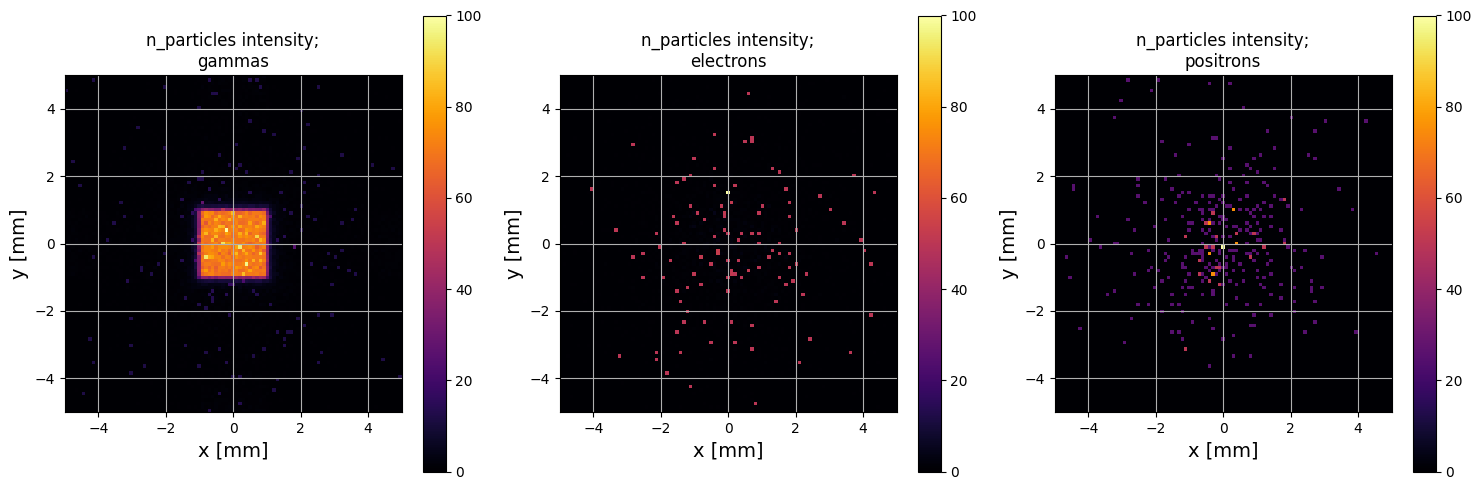

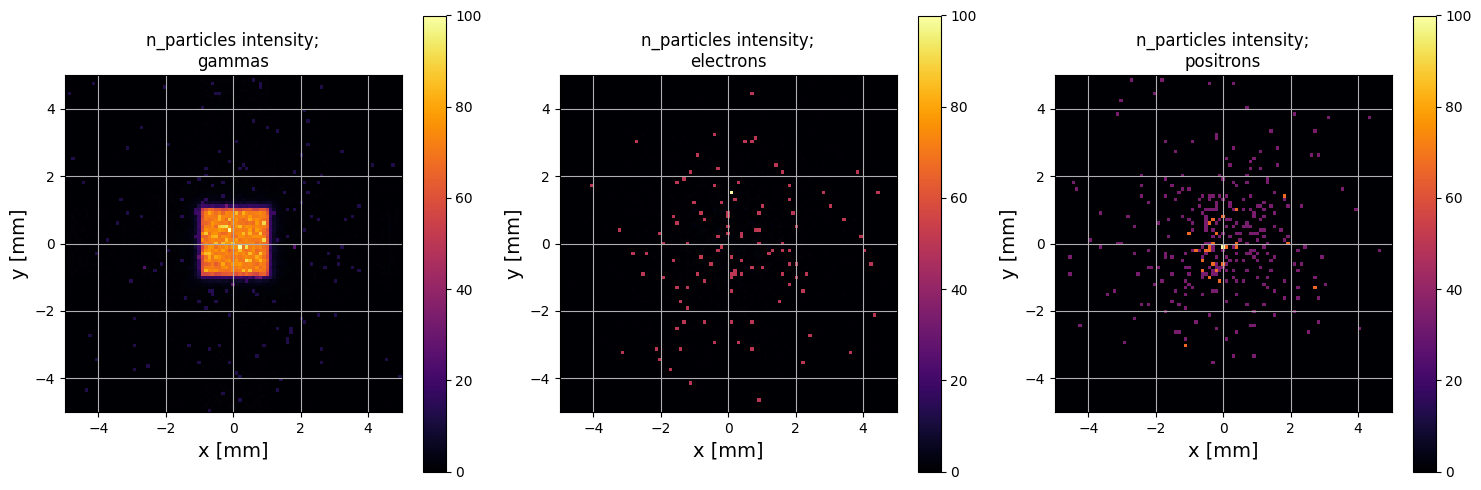

In [7]:
PS.plot_particle_positions_hist_2D(xlim=[-5,5], ylim=[-5,5])
new_PS.plot_particle_positions_hist_2D(xlim=[-5,5], ylim=[-5,5])

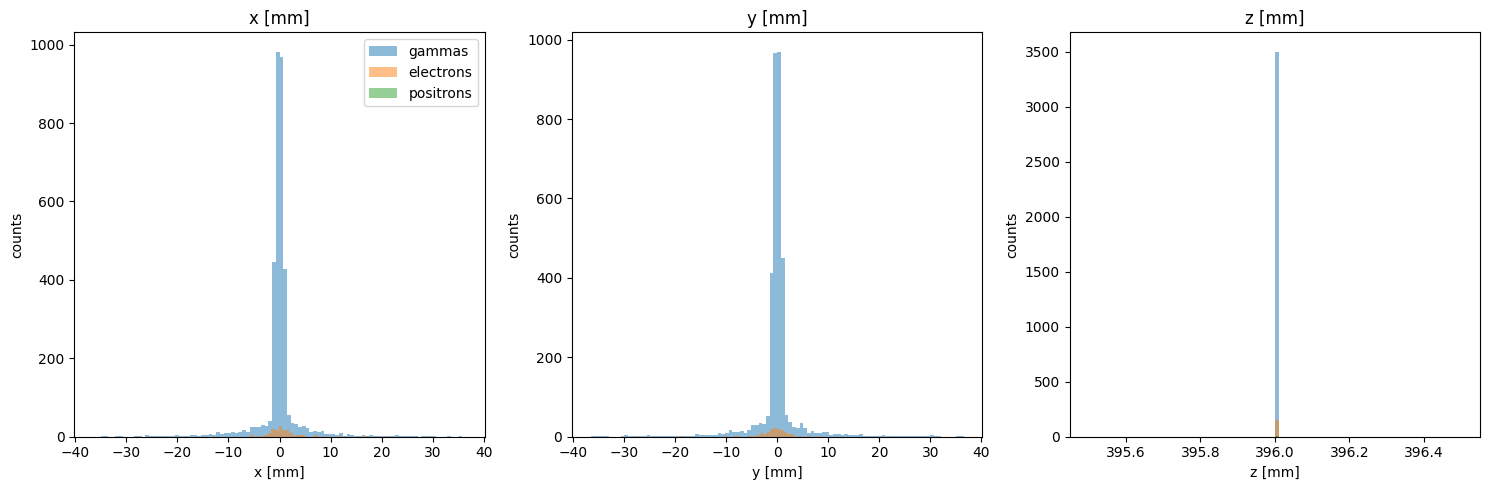

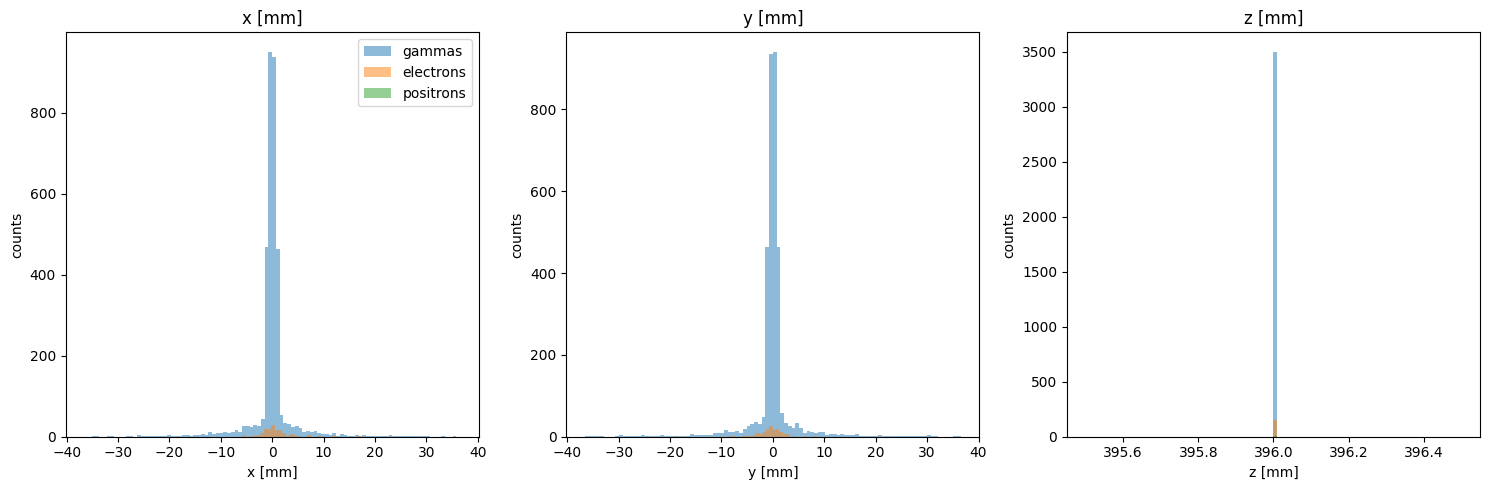

In [8]:
PS.plot_position_hist_1D()
new_PS.plot_position_hist_1D()

## Energy

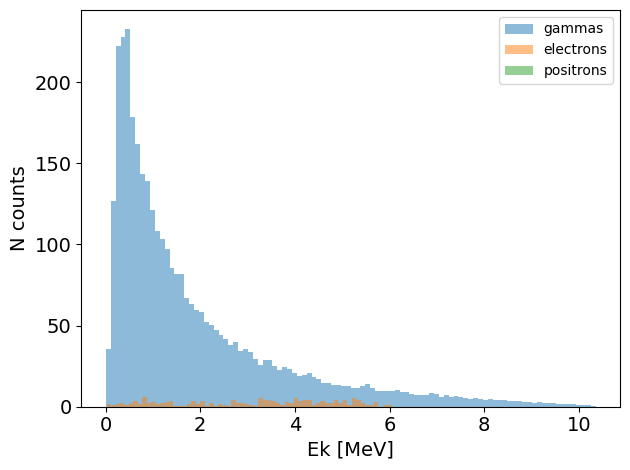

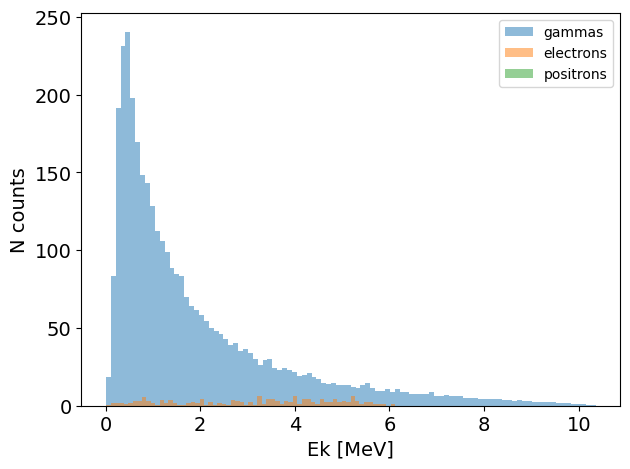

In [9]:
PS.plot_energy_hist_1D()
new_PS.plot_energy_hist_1D()

In [10]:
PS.print_energy_stats()
new_PS.print_energy_stats()

                 ENERGY STATS                  
total number of particles in phase space:  311489
number of unique particle species:  3
     308280 gammas
        mean energy:  1.91 MeV
        median energy:  1.20 MeV
        Energy spread IQR:  2.04 MeV
        min energy  0.01 MeV
        max energy  10.35 MeV
     2853 electrons
        mean energy:  3.16 MeV
        median energy:  3.39 MeV
        Energy spread IQR:  2.95 MeV
        min energy  0.02 MeV
        max energy  9.44 MeV
     356 positrons
        mean energy:  2.66 MeV
        median energy:  2.39 MeV
        Energy spread IQR:  2.39 MeV
        min energy  0.08 MeV
        max energy  8.46 MeV
                 ENERGY STATS                  
total number of particles in phase space:  124954
number of unique particle species:  3
     121745 gammas
        mean energy:  1.91 MeV
        median energy:  1.18 MeV
        Energy spread IQR:  2.09 MeV
        min energy  0.01 MeV
        max energy  10.35 MeV
     2853 ele

In [11]:
## Trace Space

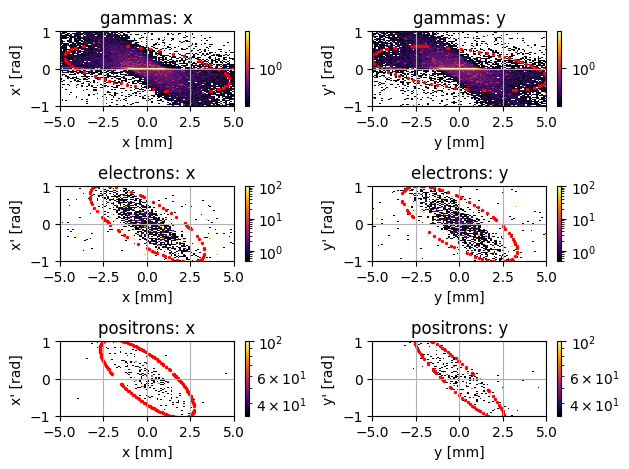

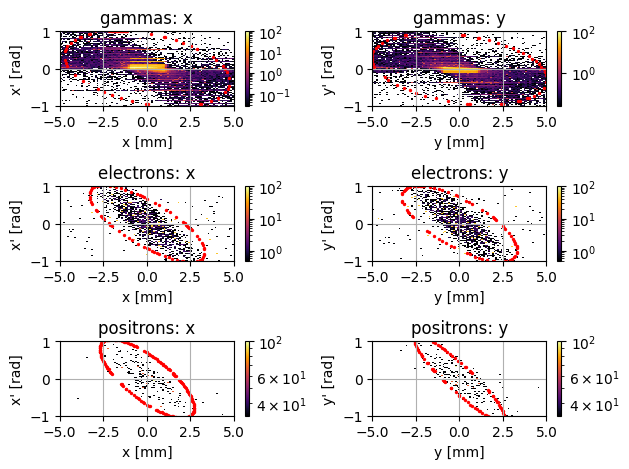

In [12]:
PS.plot_transverse_trace_space_hist_2D(xlim=[-5,5], ylim=[-1,1])
new_PS.plot_transverse_trace_space_hist_2D(xlim=[-5,5], ylim=[-1,1])

In [13]:
PS.print_twiss_parameters()
new_PS.print_twiss_parameters()

                 TWISS PARAMETERS                  

gammas:
                x         y
epsilon  2.525901  2.673361
alpha    0.619585  0.525727
beta     8.976938  9.488084
gamma    0.154160  0.134526

electrons:
                x         y
epsilon  2.208669  2.357446
alpha    1.159332  1.009164
beta     4.971102  4.634599
gamma    0.471535  0.435510

positrons:
                x         y
epsilon  1.881200  1.178092
alpha    1.141023  2.283977
beta     3.888975  5.672390
gamma    0.591913  1.095932
                 TWISS PARAMETERS                  

gammas:
                x         y
epsilon  4.510090  4.617380
alpha    0.368556  0.320703
beta     5.027730  5.493668
gamma    0.225914  0.200749

electrons:
                x         y
epsilon  2.215997  2.355163
alpha    1.153559  1.008905
beta     4.954954  4.638219
gamma    0.470377  0.435057

positrons:
                x         y
epsilon  1.887517  1.186035
alpha    1.140302  2.275951
beta     3.881295  5.643128
gamma    0.592660 